# | PCA used for Titanic Dataset |

In [1]:
# import Library

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# Data import and Processing

In [4]:
df = pd.read_csv("titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Drop String Columns and Unimportant columns

In [10]:
df = df.drop(['PassengerId'], axis=1)
df = df.drop(['Name'], axis=1)
df = df.drop(['Ticket'], axis=1)
df = df.drop(['Cabin'], axis=1)
df = df.drop(['Fare'], axis=1)

In [11]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [12]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,1
887,1,1,female,19.0,0,0,S,1
888,0,3,female,NaN,1,2,S,4
889,1,1,male,26.0,0,0,C,1


In [14]:
df = df.drop(['SibSp'], axis=1)
df = df.drop(['Parch'], axis=1)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.0,S,2
1,1,1,female,38.0,C,2
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,2
4,0,3,male,35.0,S,1


# Data Clening and modify

In [16]:
df.isnull().values.any()

True

In [17]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
Family        0
dtype: int64

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [19]:
df["Embarked"] = df["Embarked"].fillna("S")

In [20]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.0,S,2
1,1,1,female,38.0,C,2
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,2
4,0,3,male,35.0,S,1


In [21]:
df.isnull().values.any()

False

## Values Replace numarically

In [22]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [24]:
df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

In [25]:
df.Sex.replace(['male','female'], [1,0], inplace=True)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,22.0,1,2
1,1,1,0,38.0,2,2
2,1,3,0,26.0,1,1
3,1,1,0,35.0,1,2
4,0,3,1,35.0,1,1


In [27]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Embarked      int64
Family        int64
dtype: object

In [28]:
# ok

# Apply PCA

### countplot

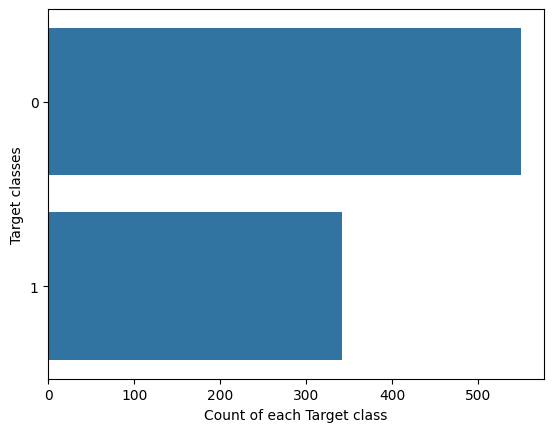

In [29]:
sns.countplot(y=df.Survived ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### Bivariate EDA

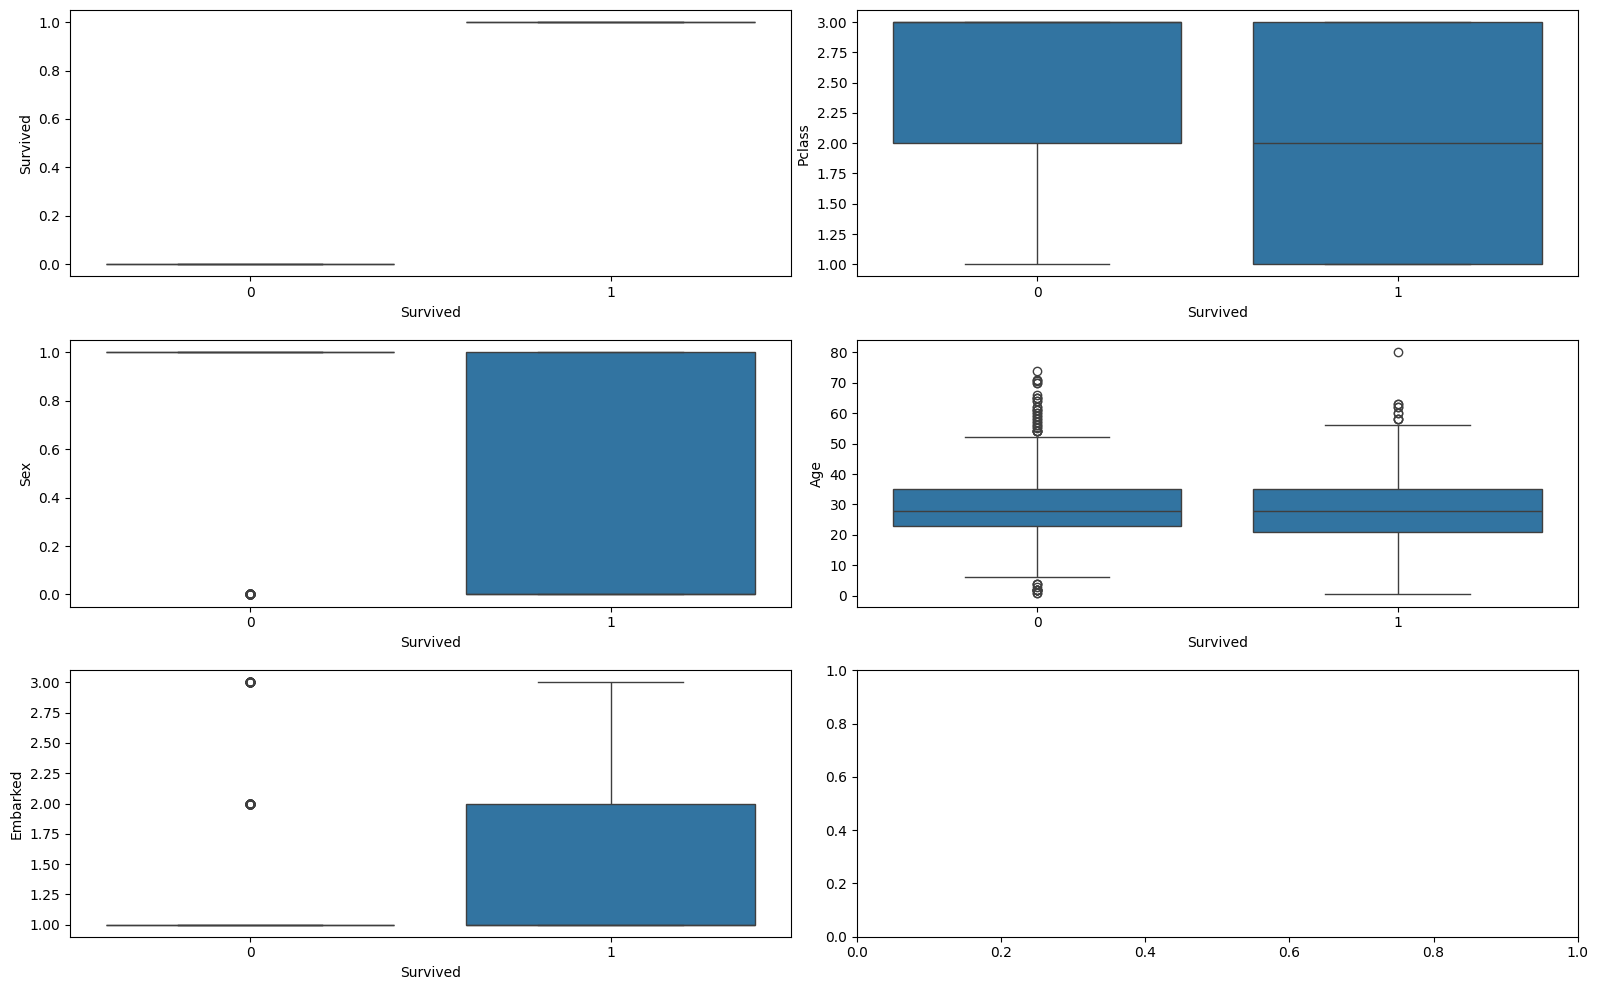

In [30]:
fig,ax = plt.subplots(nrows = 3, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Survived'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

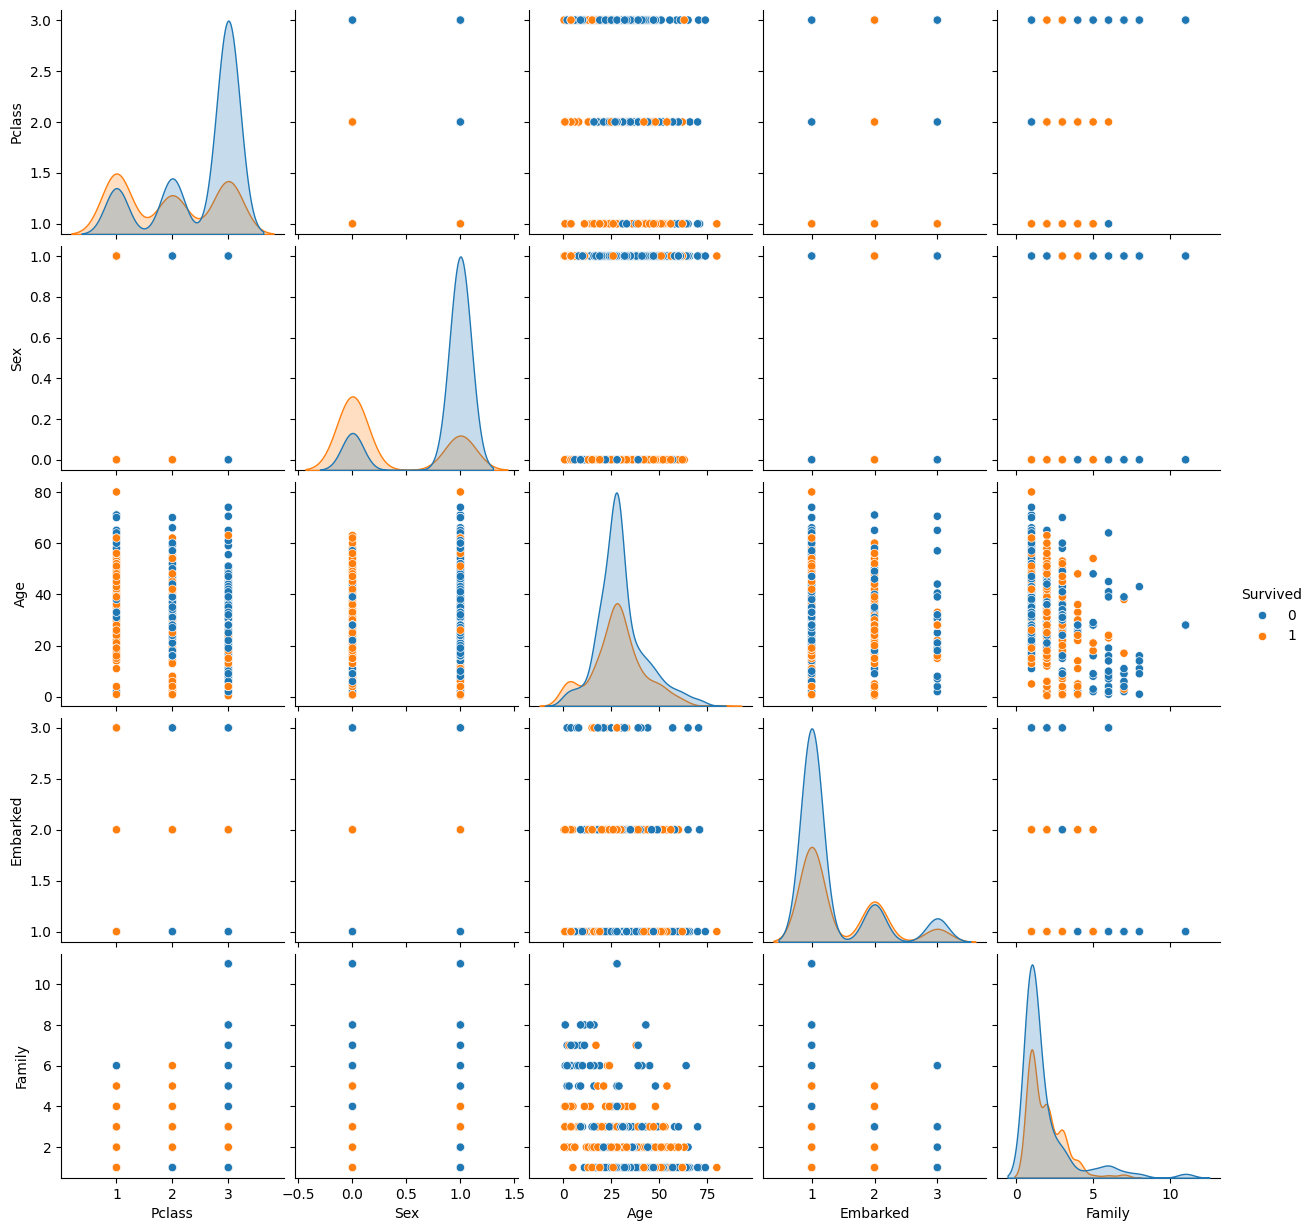

In [31]:
sns.pairplot(df, hue = 'Survived')

<Axes: >

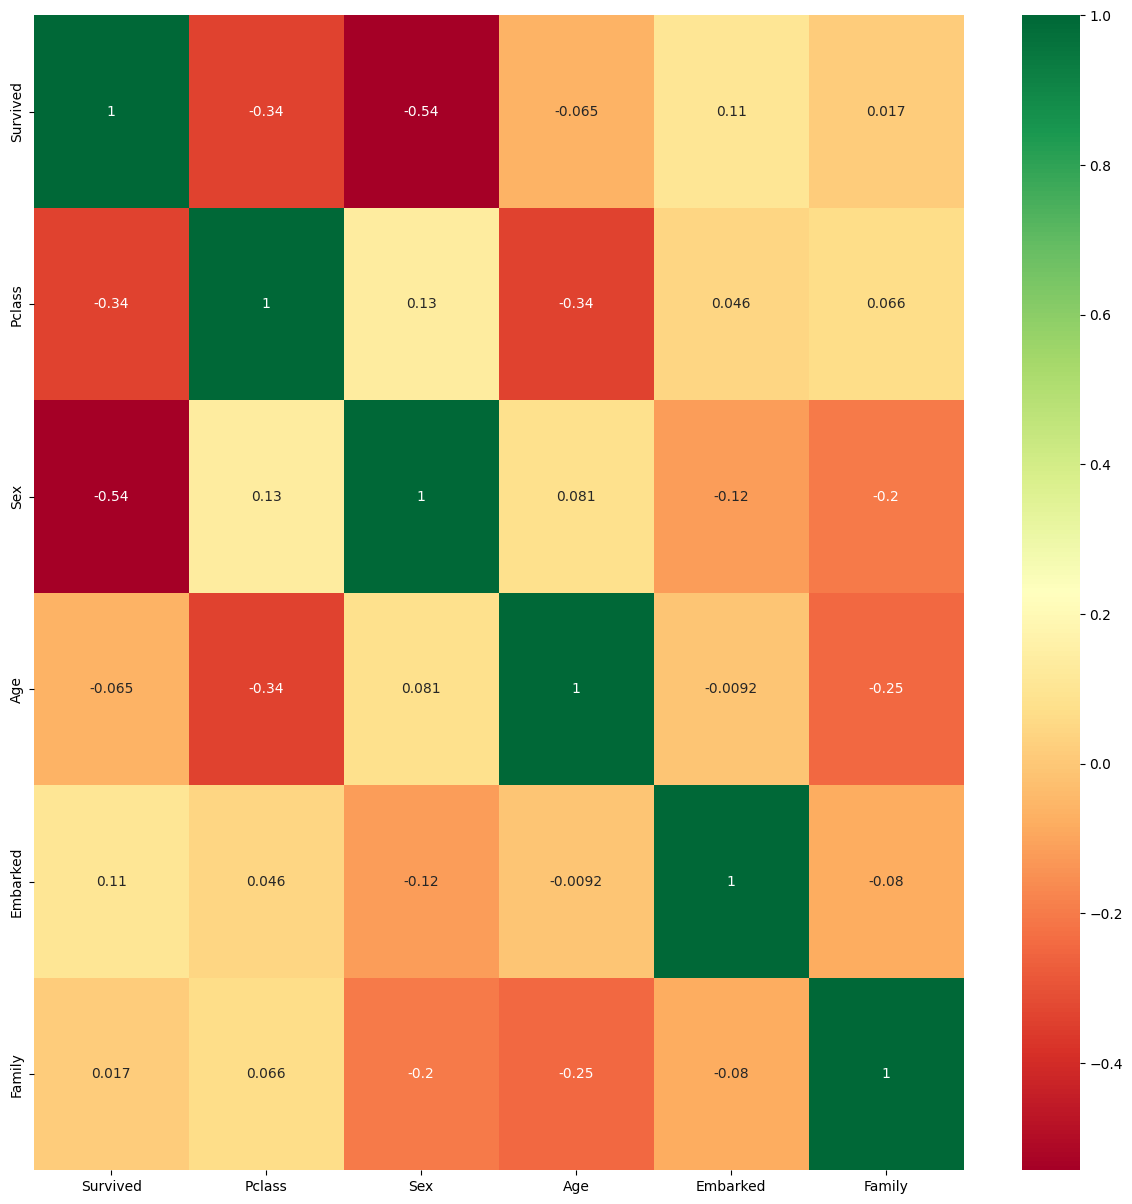

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn') 

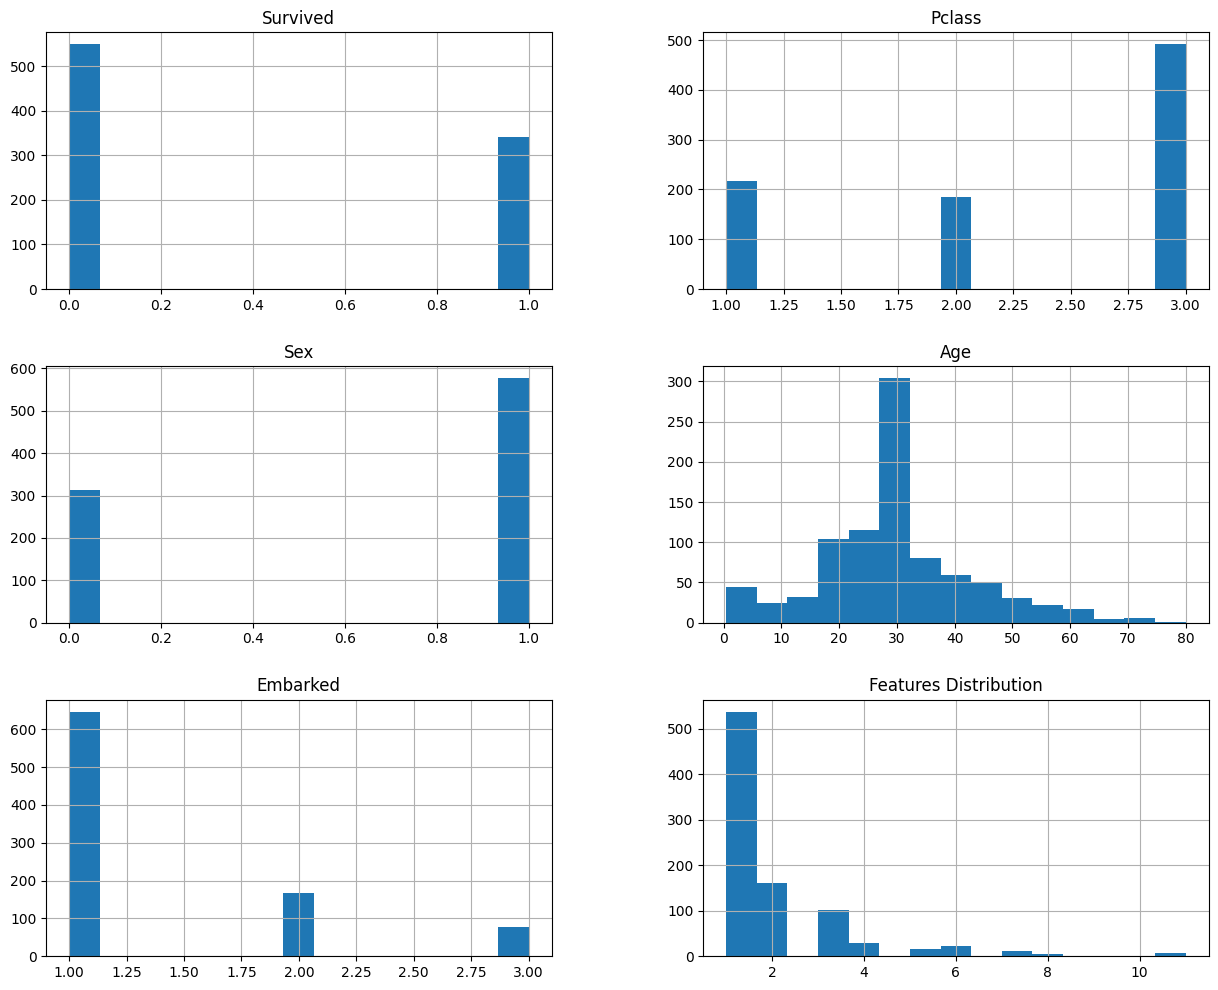

In [33]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

## Modelling

# 1. Without PCA

In [34]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [35]:
X.head()

,Pclass,Sex,Age,Embarked,Family
0,3,1,22.0,1,2
1,1,0,38.0,2,2
2,3,0,26.0,1,1
3,1,0,35.0,1,2
4,3,1,35.0,1,1


In [36]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [39]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.8186195826645265 %
Test score before PCA 0.8171641791044776 %


# 2. With PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [43]:
X_new

array([[-0.46838766, -0.18547481, -0.16922218,  0.03864467, -0.03272174],
       [ 0.86722346,  0.34834859,  0.29487354, -0.00994306,  0.02935281],
       [ 0.4533807 , -0.50199316, -0.29750276, -0.17177738, -0.07690713],
       ...,
       [ 0.47075987, -0.51775287, -0.32533442,  0.03661633,  0.13728594],
       [-0.0669089 ,  0.66151695,  0.43759932,  0.11474639, -0.13233311],
       [-0.37314424, -0.31881815,  0.82508172, -0.04057835,  0.03069804]])

In [44]:
pca.get_covariance()

array([[ 0.17475378,  0.02635594, -0.02324659,  0.00607227,  0.00445138],
       [ 0.02635594,  0.22847451,  0.00634704, -0.01770955, -0.01550057],
       [-0.02324659,  0.00634704,  0.02676664, -0.00047659, -0.00648361],
       [ 0.00607227, -0.01770955, -0.00047659,  0.10102019, -0.00411695],
       [ 0.00445138, -0.01550057, -0.00648361, -0.00411695,  0.02603248]])

In [45]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.4333885 , 0.30659315, 0.17630049, 0.05046132, 0.03325653])

In [47]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [48]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [49]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.8282504012841091 %
Test score after PCA 0.7985074626865671 %


C:\Users\RealTime\AppData\Local\Temp\ipykernel_5720\1819296938.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


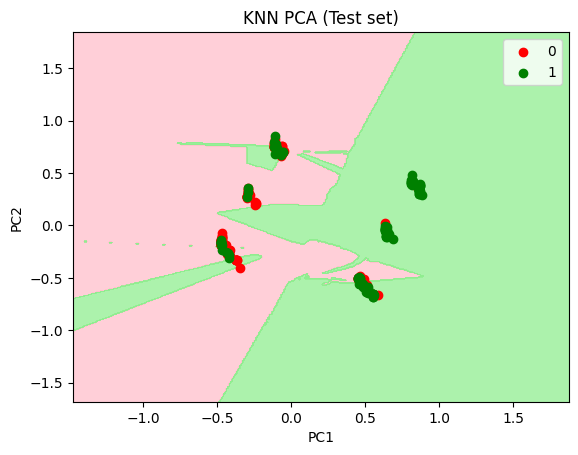

In [50]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()